In [3]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.2.0


In [4]:
#Cohen, G., Afshar, S., Tapson, J., & van Schaik, A. (2017). 
#EMNIST: an extension of MNIST to handwritten letters. Retrieved from http://arxiv.org/abs/1702.05373
from emnist import extract_training_samples
train_images, train_labels = extract_training_samples('letters')
#train_images.shape #Train images set
#train_labels.shape
#for i in range(len(train_labels)):
 #   train_labels[i] = train_labels[i] - 1
print(train_labels)

[23  7 16 ... 13 15 19]


In [5]:
from emnist import extract_test_samples
test_images, test_labels = extract_test_samples('letters')
#test_images.shape #Test images set
#test_labels.shape

#for i in range(len(test_labels)):
 #   test_labels[i] = test_labels[i] - 1
print(test_labels)

[ 1  1  1 ... 26 26 26]


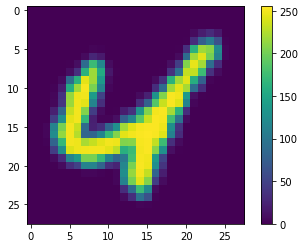

In [6]:
#Showing a picture of a certain element in the image training set
plt.figure()
plt.imshow(train_images[13])
plt.colorbar()
plt.grid(False)
plt.show()

In [7]:
#The output and the corresponding 26 classes
class_names = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P',
               'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']
print (len(class_names))

26


In [8]:
#Feature scaling for each element in the 2D array/picture. Each pixel is a value of 255, so we scale them to a scale of 0 to 1
train_images = train_images / 255.0

test_images = test_images / 255.0

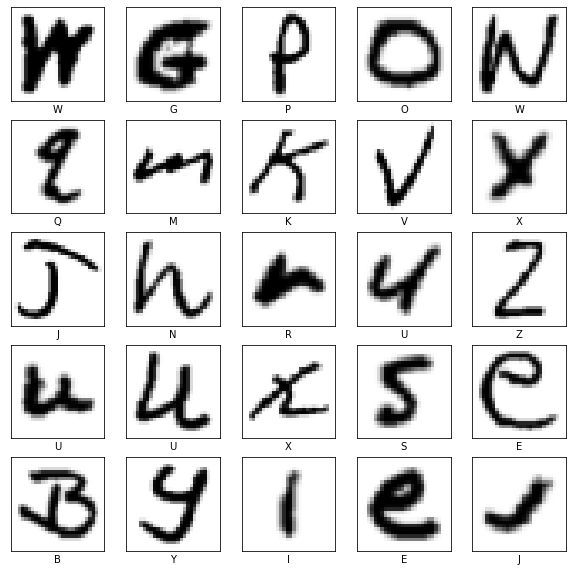

In [9]:
#Showing the first 25 training images in the set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]-1])
plt.show()

In [10]:
Ni = train_images.shape[1]*train_images.shape[2] #Number of neurons in the input layer
No = len(class_names) #Number of neurons in the input layer
Ns = train_images.shape[0] #Number of samples in the training data set
a = 2 #Scaling factor, arbitrary
Nh = Ns/(a*(No+Ni)) #Rule of thumb according to  http://hagan.okstate.edu/NNDesign.pdf#page=469
print(round(Nh))

77


In [11]:
#Creating the neural networks with 1 hidden layer
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)), #Flattening the 2D arrays into a 1D arrays with 28x28 elements - Input layer
    keras.layers.Dense(Nh, activation='relu'),
    keras.layers.Dense(26) #Output layers with 26 classes
])

In [12]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [16]:
train_labels1 = list()
for i in range(len(train_labels)):
    train_labels1.append(train_labels[i] - 1.0)

In [19]:
model.fit(train_images, train_labels-1, epochs=10)

Epoch 1/10
3900/3900 [==============================] - 9s 2ms/step - loss: 0.8233 - accuracy: 0.7600
Epoch 2/10
3900/3900 [==============================] - 8s 2ms/step - loss: 0.4977 - accuracy: 0.8490
Epoch 3/10
3900/3900 [==============================] - 8s 2ms/step - loss: 0.4245 - accuracy: 0.8699
Epoch 4/10
3900/3900 [==============================] - 9s 2ms/step - loss: 0.3884 - accuracy: 0.8795
Epoch 5/10
3900/3900 [==============================] - 8s 2ms/step - loss: 0.3647 - accuracy: 0.8863
Epoch 6/10
3900/3900 [==============================] - 8s 2ms/step - loss: 0.3470 - accuracy: 0.8907
Epoch 7/10
3900/3900 [==============================] - 9s 2ms/step - loss: 0.3339 - accuracy: 0.8939
Epoch 8/10
3900/3900 [==============================] - 8s 2ms/step - loss: 0.3231 - accuracy: 0.8966
Epoch 9/10
3900/3900 [==============================] - 8s 2ms/step - loss: 0.3145 - accuracy: 0.8999
Epoch 10/10
3900/3900 [==============================] - 8s 2ms/step - loss: 0.306

In [20]:
test_loss, test_acc = model.evaluate(test_images,  test_labels-1, verbose=2)

print('\nTest accuracy:', test_acc)

650/650 - 1s - loss: 0.4037 - accuracy: 0.8797

Test accuracy: 0.8796634674072266


In [48]:
#Assess the probability of falling into each class for an individual observation
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

predictions = probability_model.predict(test_images)
index = 1040

In [49]:
print(predictions[index])
print("The letter is labeled: ", test_labels[index]-1)
print("The letter is predicted to be: ", np.argmax(predictions[index]))

[1.7145821e-05 9.9939823e-01 2.0307642e-09 3.3251694e-04 3.2323865e-07
 1.6371692e-07 1.7236428e-04 4.4761709e-05 3.1374841e-09 3.5609190e-07
 3.0916995e-06 2.0615101e-08 3.8289996e-13 4.4730764e-11 1.5866300e-10
 6.3969541e-12 1.2357029e-06 6.4302377e-09 3.2154242e-07 2.6216298e-06
 4.8473112e-06 2.6163709e-09 3.3533718e-06 3.3549981e-07 1.8063320e-05
 7.8442490e-08]
The letter is labeled:  1
The letter is predicted to be:  1


In [50]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(26))
  plt.yticks([])
  thisplot = plt.bar(range(26), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

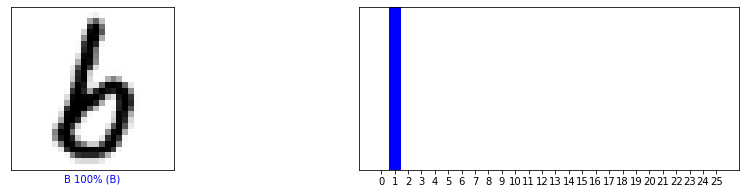

In [51]:
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plot_image(index, predictions[index], test_labels-1, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions[index],  test_labels-1)
plt.show()

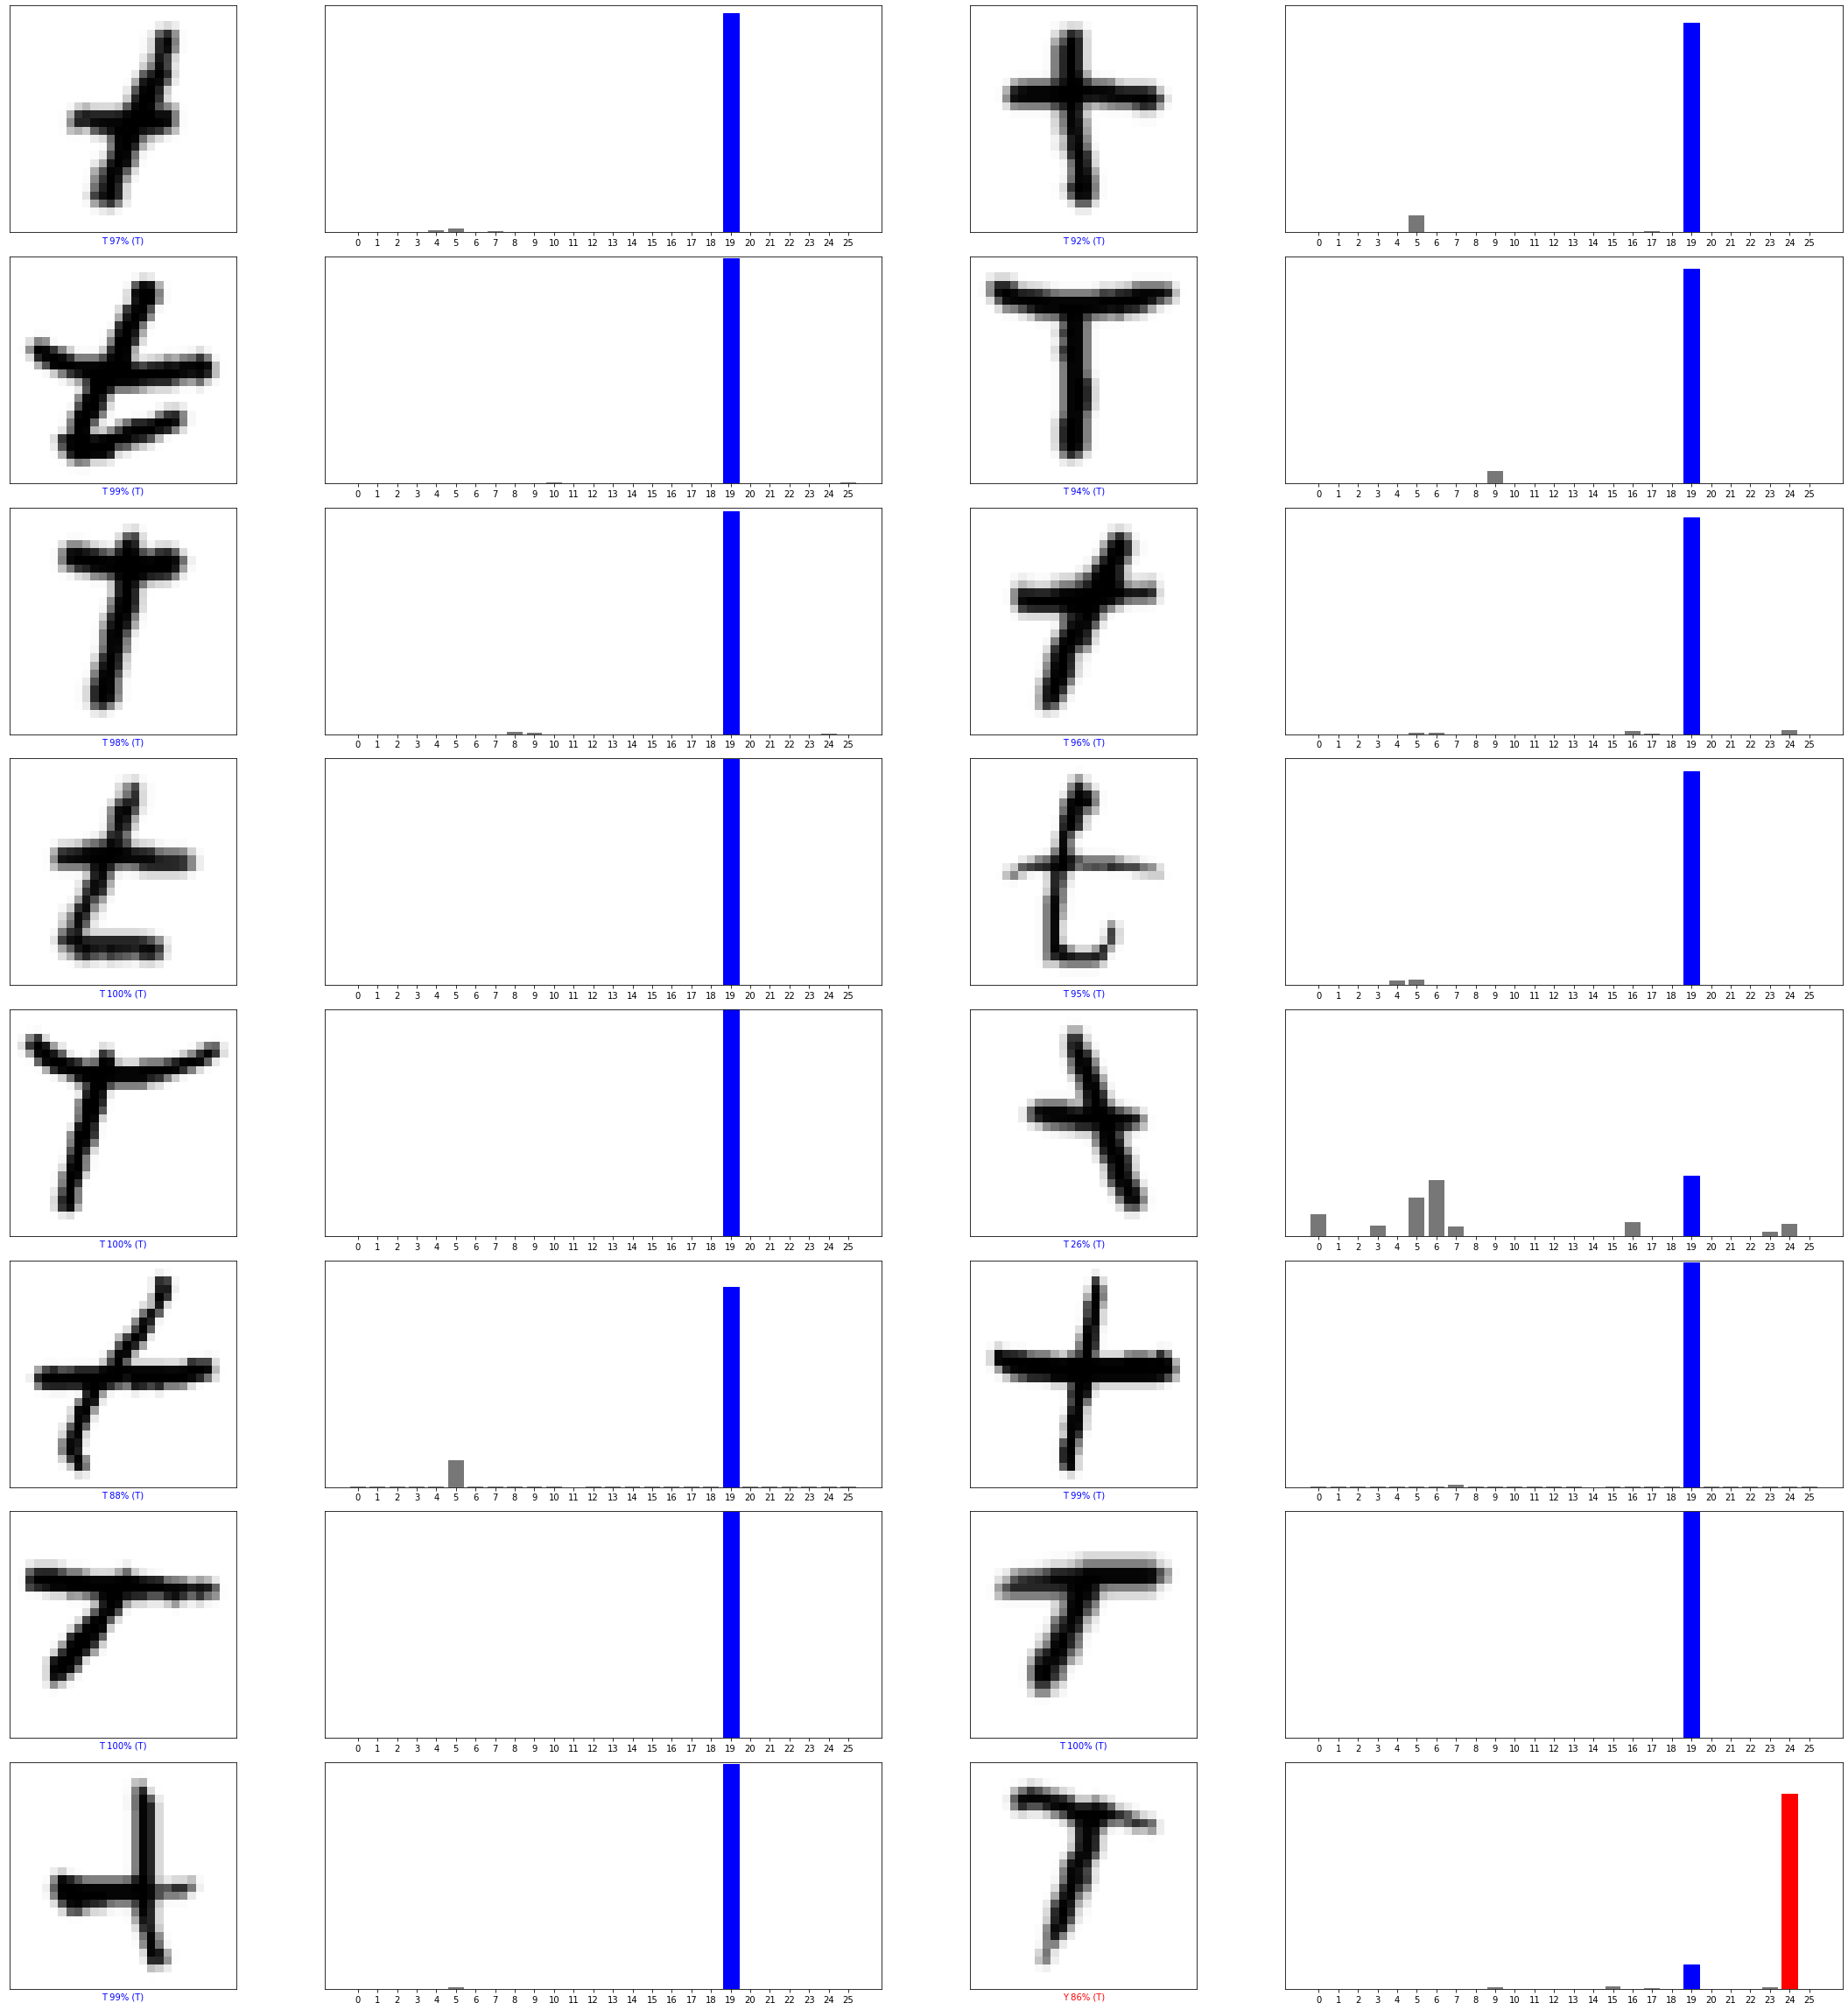

15378


In [81]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 8
num_cols = 2
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols*4, 2*num_rows*2))
a = np.random.randint(0,len(test_labels) - num_images) #A random number to show a different set when run the kernel multiple time
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i+a, predictions[i+a], test_labels-1, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i+a, predictions[i+a], test_labels-1)
plt.tight_layout()
plt.show()
print(a)

In [116]:
#Testing a single element and put it through the model
# Grab an image from the test dataset.
index = 16783
img = test_images[index]

print(img.shape)

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(28, 28)
(1, 28, 28)


[[5.9867423e-04 5.6017907e-05 3.6696278e-04 6.1543702e-05 8.0679172e-05
  1.7953144e-07 2.4626686e-03 1.3405938e-05 1.7113489e-07 6.8123768e-07
  2.2724376e-07 6.9305506e-06 3.5594007e-07 3.0304471e-07 2.3511513e-05
  7.1715974e-08 1.6100081e-05 1.1342528e-06 1.7495790e-06 1.3457483e-07
  9.9626631e-01 8.8228562e-06 3.1750518e-05 9.1465422e-09 1.6287322e-06
  1.7275736e-08]]


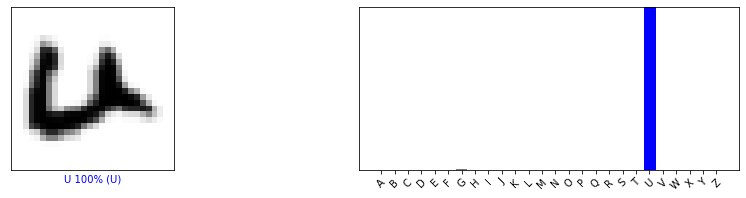

In [117]:
predictions_single = probability_model.predict(img)

print(predictions_single)
plt.figure(figsize=(15,3))
plt.subplot(1,2,1)
plot_image(index, predictions[index], test_labels-1, test_images)
plt.subplot(1,2,2)
plot_value_array(index, predictions_single[0], test_labels-1)
_ = plt.xticks(range(len(class_names)), class_names, rotation=45)